<a href="https://colab.research.google.com/github/antonsysoev/ktmi_pm/blob/%D0%9F%D0%9C-19/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для проведения кластерного анализа мы будем использовать набор данных "Цены на персональные компьютеры". Этот набор данных содержит 6259 наблюдений и 10 признаков. В наборе данных рассматриваются цены с 1993 по 1995 год на 486 персональных компьютеров в США. Переменными являются цена, скорость, память, экран, компакт-диск и другие.

In [ ]:
install.packages("ggplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(dplyr)
PATH <-"https://raw.githubusercontent.com/guru99-edu/R-Programming/master/computers.csv"
df <- read.csv(PATH) %>%
select(-c(X, cd, multi, premium))
glimpse(df)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 6,259
Columns: 7
$ price  <int> 1499, 1795, 1595, 1849, 3295, 3695, 1720, 1995, 2225, 2575, 219…
$ speed  <int> 25, 33, 25, 25, 33, 66, 25, 50, 50, 50, 33, 66, 50, 25, 50, 50,…
$ hd     <int> 80, 85, 170, 170, 340, 340, 170, 85, 210, 210, 170, 210, 130, 2…
$ ram    <int> 4, 2, 4, 8, 16, 16, 4, 2, 8, 4, 8, 8, 4, 8, 8, 4, 2, 4, 4, 8, 4…
$ screen <int> 14, 14, 15, 14, 14, 14, 14, 14, 14, 15, 15, 14, 14, 14, 14, 14,…
$ ads    <int> 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,…
$ trend  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [ ]:
summary(df)

     price          speed              hd              ram        
 Min.   : 949   Min.   : 25.00   Min.   :  80.0   Min.   : 2.000  
 1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214.0   1st Qu.: 4.000  
 Median :2144   Median : 50.00   Median : 340.0   Median : 8.000  
 Mean   :2220   Mean   : 52.01   Mean   : 416.6   Mean   : 8.287  
 3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528.0   3rd Qu.: 8.000  
 Max.   :5399   Max.   :100.00   Max.   :2100.0   Max.   :32.000  
     screen           ads            trend      
 Min.   :14.00   Min.   : 39.0   Min.   : 1.00  
 1st Qu.:14.00   1st Qu.:162.5   1st Qu.:10.00  
 Median :14.00   Median :246.0   Median :16.00  
 Mean   :14.61   Mean   :221.3   Mean   :15.93  
 3rd Qu.:15.00   3rd Qu.:275.0   3rd Qu.:21.50  
 Max.   :17.00   Max.   :339.0   Max.   :35.00  

In [ ]:
rescale_df <- df %>%
mutate(price_scal = scale(price),
    hd_scal = scale(hd),
    ram_scal = scale(ram),
    screen_scal = scale(screen),
    ads_scal = scale(ads),
    trend_scal = scale(trend)) %>%
select(-c(price, speed, hd, ram, screen, ads, trend))

In [ ]:
rescale_df

price_scal,hd_scal,ram_scal,screen_scal,ads_scal,trend_scal
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
-1.24065376,-1.3018902,-0.76129843,-0.6725370,-1.701083,-1.895735
-0.73101535,-1.2825515,-1.11646890,-0.6725370,-1.701083,-1.895735
-1.07536563,-0.9537930,-0.76129843,0.4322948,-1.701083,-1.895735
-0.63804078,-0.9537930,-0.05095751,-0.6725370,-1.701083,-1.895735
1.85161168,-0.2962760,1.36972433,-0.6725370,-1.701083,-1.895735
2.54031223,-0.2962760,1.36972433,-0.6725370,-1.701083,-1.895735
-0.86014671,-0.9537930,-0.76129843,-0.6725370,-1.701083,-1.895735
-0.38666508,-1.2825515,-1.11646890,-0.6725370,-1.701083,-1.895735
0.00933773,-0.7990831,-0.05095751,-0.6725370,-1.701083,-1.895735


In [ ]:
kmean_withinss <- function(k) {
    cluster <- kmeans(rescale_df, k)
    return (cluster$tot.withinss)
}

In [ ]:
kmean_withinss(2)

[1] 27400.21

In [ ]:
# Set maximum cluster 
max_k <-20 
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss)

In [ ]:
# Create a data frame to plot the graph
elbow <-data.frame(2:max_k, wss)

In [ ]:
elbow

X2.max_k,wss
<int>,<dbl>
2,27400.210
3,21990.051
4,18155.076
5,15468.456
6,12719.121
7,13835.011
8,10769.426
9,10460.733
10,9945.263


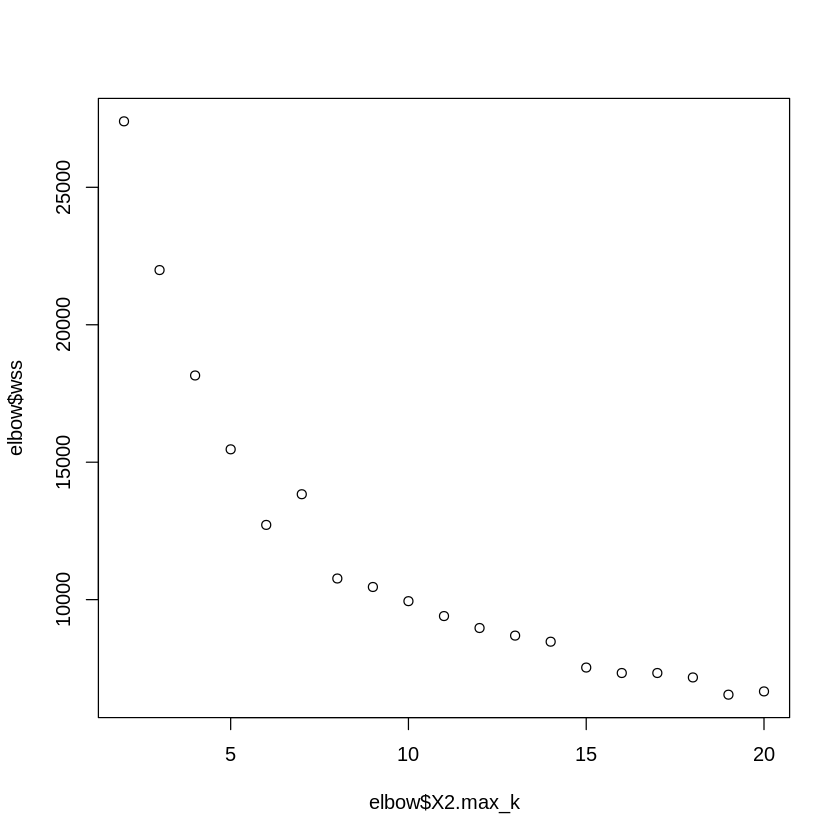

In [ ]:
plot(elbow$X2.max_k, elbow$wss)

In [ ]:
pc_cluster_2 <-kmeans(rescale_df, 7)

In [ ]:
pc_cluster_2$cluster
pc_cluster_2$centers
pc_cluster_2$size

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 [112] 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1 2
 [223] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 1 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 7 2 2 1 2 2
 [519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 7 2 2 2 2 2 2 2 2 2 2 3 7 2 7
 [556] 3 2 1 7 2 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 1 2 7 2 2 2 2 1 2 1 2 7 2 2 2 2 2
 [593] 7 2 2 3 2 2 2 2 2 7 2 7 3 3 2 3 2 2 7 7 2 2 2 7 2 2 2 3 1 2 2 2 2 7 2 2 2
 [630] 2 2 2 2 3 2 2 2 3 2 2 3 1 2 7 2 1 7 2 2 2 2 2 2 2 2 2 1 3 2 2 1 2 2 2 2 7
 [667] 7 2 2 2 2 7 7 7 2 2 1 2 2 2 1 3 2 7 2 2 1 2 2 7 2 2 2 7 3 2 2 2 7 3 2 2 2
 [704] 7 2 2 7 2 2 2 7 2 3 7 3 3 7 1 7 1 7 3 7 3 3 3 3 7 7 3 3 3 3 3 3 3 3 3 7 7
 [741] 7 3 3 3 3 1 3 3 3 7 3 1 3 7 1 3 3 1 3 3 3 3 3 7 3 3 7 3 3 7 3 3 1 7 7 7 3
 [778] 3 7 7 3 3 7 7 3 3 3 7 3 7 3 7 3 1 3 7 7 3 7 7 3 7 3 1 3 7 3 7 3 3 7 3 3 7
 [815] 3 3 7 3 3 3 7 7 7 7 7 3 3 3 3 7 7 3 3 3 3 3 7 3 3 7 7 3 7 7 7 3 3 3 3 3 3
 [852] 3 7 3 7 7 3 3 3 7 3 3 3 3 7 3 3 7 7 7 3 3 3 3 3 7 3 3 3 3 7 1 3 7 7 3 7 7
 [889] 3 3 7 7 3 3 1 3 7 7 3 3 7 7 7 3 7 3 3 3 7 3 7 3 3 3 3 3 3 3 3 3 7 3 7 3 3
 [926] 3 3 3 7 3 3 7 3 3 3 1 7 7 3 3 3 7 3 3 7 3 3 7 3 3 7 7 3 3 7 7 3 7 3 7 3 3
 [963] 7 3 7 7 3 3 3 7 7 3 1 3 7 7 3 3 3 3 3 7 7 3 7 7 3 3 3 3 3 3 3 7 7 7 3 3 1
[1000] 3 3 3 3 1 3 3 3 1 3 1 3 1 3 3 3 3 7 3 3 3 7 3 7 3 7 7 3 3 3 7 7 3 7 3 3 1
[1037] 3 7 7 7 7 3 7 3 3 3 3 7 7 3 7 3 3 3 3 7 3 3 3 7 3 3 3 3 7 3 3 1 3 7 7 3 3
[1074] 3 3 7 3 7 7 3 3 7 3 3 3 7 3 7 7 3 7 3 3 7 7 3 7 3 7 3 3 7 3 3 3 3 7 3 7 7
[1111] 3 3 3 3 3 3 7 7 7 3 7 3 7 3 3 7 7 7 3 7 3 3 7 3 3 1 3 3 7 3 3 1 1 7 1 7 7
[1148] 3 3 7 7 7 3 7 1 7 7 3 1 3 7 1 7 7 3 7 3 3 3 7 3 7 7 3 3 1 7 7 7 3 3 7 3 1
[1185] 3 3 7 3 3 3 3 3 3 3 3 7 3 3 7 3 3 1 7 1 3 3 1 7 3 7 3 3 3 3 7 3 7 7 3 3 7
[1222] 3 3 3 7 7 3 3 3 1 3 7 3 3 3 7 3 3 3 3 3 3 3 3 3 3 7 3 3 7 3 3 3 1 3 3 7 3
[1259] 7 7 3 7 7 3 3 7 7 7 7 3 3 7 3 7 3 1 7 3 3 7 3 3 7 7 3 3 7 3 3 3 3 3 7 3 3
[1296] 3 7 3 7 7 3 3 3 3 7 7 7 3 1 3 3 3 3 1 3 3 3 3 7 3 3 3 7 3 7 3 7 3 3 3 3 3
[1333] 3 3 7 1 7 3 3 1 7 7 7 3 3 7 7 3 3 3 7 1 7 3 7 3 7 3 3 3 3 3 3 7 7 3 7 3 3
[1370] 7 3 3 3 7 3 7 3 3 3 7 3 3 3 3 3 1 7 1 3 3 3 3 3 3 1 3 3 7 3 3 3 3 3 7 7 7
[1407] 7 7 7 3 3 1 3 3 7 3 3 3 7 7 3 3 3 3 3 3 3 3 3 3 3 7 7 3 7 3 3 3 7 7 1 3 7
[1444] 3 7 1 3 1 3 7 7 3 7 3 7 3 7 7 7 7 7 3 3 7 3 7 7 7 3 3 7 3 3 3 7 7 7 1 3 7
[1481] 3 7 7 7 7 3 3 7 7 3 7 7 7 3 3 7 7 3 3 3 3 7 1 3 3 7 5 3 3 1 7 3 3 3 7 7 7
[1518] 3 3 7 3 7 3 3 7 3 3 7 3 7 3 3 1 3 7 3 3 3 3 3 3 3 1 7 3 7 3 3 3 7 3 3 3 3
[1555] 3 7 3 7 3 7 7 3 3 3 7 1 7 3 7 3 3 3 7 3 7 3 3 3 7 1 3 3 3 3 3 7 1 7 7 7 3
[1592] 3 3 1 3 3 1 7 7 3 1 3 7 3 7 7 3 7 3 3 7 3 3 1 3 3 7 7 3 7 3 3 1 3 7 3 3 7
[1629] 7 3 3 3 3 3 3 3 3 7 7 3 3 7 7 7 3 3 3 3 3 3 3 1 3 7 7 3 3 3 7 3 7 3 7 3 7
[1666] 7 7 3 7 7 7 3 7 3 3 3 3 3 7 3 7 7 3 3 3 3 3 3 7 3 3 7 3 3 3 7 1 3 7 3 1 3
[1703] 3 7 7 3 7 7 3 7 3 1 1 7 3 3 3 7 3 3 7 3 1 3 3 3 3 3 3 3 7 3 7 1 3 3 7 7 7
[1740] 1 7 3 3 7 7 3 3 3 7 3 7 7 3 7 7 7 7 3 3 3 3 3 1 7 3 7 7 1 7 7 3 3 7 3 7 7
[1777] 3 7 3 3 3 3 3 3 7 3 7 3 7 7 7 7 3 3 7 3 7 3 3 3 7 7 7 3 3 7 1 7 3 7 3 1 3
[1814] 1 3 7 7 1 3 1 7 3 7 3 3 3 1

,price_scal,hd_scal,ram_scal,screen_scal,ads_scal,trend_scal
1,1.0912296,-0.2401936,0.006526723,2.6419582,0.4704301,-0.4132057
2,0.2215678,-0.7132577,-0.318050275,-0.3878782,-1.3206229,-1.5490909
3,-0.6370072,-0.7139181,-0.694853816,-0.4402773,0.6842653,-0.3450303
4,-0.1323863,0.6299541,0.004786730,2.6419582,-0.8894946,1.2673184
5,0.8830191,2.1019454,2.168706085,0.4492922,-0.9035248,1.2069855
6,-0.8102386,0.2741895,-0.306413450,-0.3229329,-0.8847421,1.2018853
7,0.8787018,0.2561907,0.515202686,-0.1993897,0.6746032,-0.3332036


[1]  346  621 2074  223  585 1065 1345

In [ ]:
center <-pc_cluster_2$centers
center

,price_scal,hd_scal,ram_scal,screen_scal,ads_scal,trend_scal
1,1.0912296,-0.2401936,0.006526723,2.6419582,0.4704301,-0.4132057
2,0.2215678,-0.7132577,-0.318050275,-0.3878782,-1.3206229,-1.5490909
3,-0.6370072,-0.7139181,-0.694853816,-0.4402773,0.6842653,-0.3450303
4,-0.1323863,0.6299541,0.004786730,2.6419582,-0.8894946,1.2673184
5,0.8830191,2.1019454,2.168706085,0.4492922,-0.9035248,1.2069855
6,-0.8102386,0.2741895,-0.306413450,-0.3229329,-0.8847421,1.2018853
7,0.8787018,0.2561907,0.515202686,-0.1993897,0.6746032,-0.3332036


Нечеткая кластеризация

In [ ]:
install.packages("fclust")
install.packages("ppclust")
install.packages("cluster")
install.packages("factoextra")

require(ppclust)
require(factoextra)
require(dplyr)
require(cluster)
require(psych)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Loading required package: factoextra

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Lo

In [ ]:
data(iris)
x=iris[,-5]
x[1:5,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


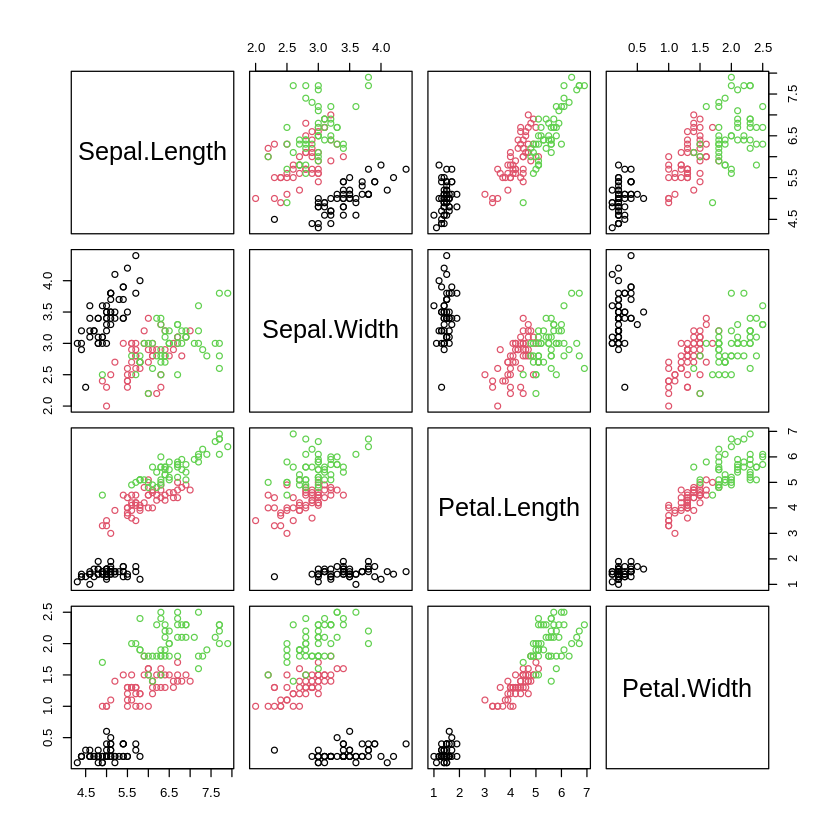

In [ ]:
pairs(x, col=iris[,5])

In [ ]:
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [ ]:
res.fcm <- fcm(x, centers=3)

In [ ]:
as.data.frame(res.fcm$u)[1:6,]

,Cluster 1,Cluster 2,Cluster 3
,<dbl>,<dbl>,<dbl>
1,0.001072034,0.9966236,0.002304380
2,0.007497947,0.9758525,0.016649509
3,0.006414579,0.9798259,0.013759500
4,0.010107523,0.9674274,0.022465031
5,0.001767935,0.9944704,0.003761709
6,0.020619654,0.9345741,0.044806233


In [ ]:
summary(res.fcm)

Summary for 'res.fcm'

Number of data objects:  150 

Number of clusters:  3 

Crisp clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 1 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Initial cluster prototypes:
          Sepal.Length Sepal.Width Petal.Length Petal.Width
Cluster 1          6.5         3.0          5.2         2.0
Cluster 2          5.0         3.2          1.2         0.2
Cluster 3          5.5         2.5          4.0         1.3

Final cluster prototypes:
          Sepal.Length Sepal.Width Petal.Length Petal.Width
Cluster 1     6.775011    3.052382     5.646782   2.0535467
Cluster 2     5.003966    3.414089     1.482816   0.2535463
Cluster 3     5.888932    2.761069     4.363952   1.3973150

Distance between the final cl

In [ ]:
res.fcm <- fcm(x, centers=3, nstart=5)

res.fcm$func.val

[1] 60.50571 60.50571 60.50571 60.50571 60.50571

In [ ]:
res.fcm$iter

[1] 49 49 45 50 46

In [ ]:
res.fcm$best.start

[1] 1

In [ ]:
summary(res.fcm)

Summary for 'res.fcm'

Number of data objects:  150 

Number of clusters:  3 

Crisp clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 1 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Initial cluster prototypes:
          Sepal.Length Sepal.Width Petal.Length Petal.Width
Cluster 1          6.3         2.3          4.4         1.3
Cluster 2          5.1         3.5          1.4         0.3
Cluster 3          7.2         3.6          6.1         2.5

Final cluster prototypes:
          Sepal.Length Sepal.Width Petal.Length Petal.Width
Cluster 1     6.775011    3.052382     5.646782   2.0535467
Cluster 2     5.003966    3.414089     1.482816   0.2535463
Cluster 3     5.888932    2.761069     4.363952   1.3973150

Distance between the final cl

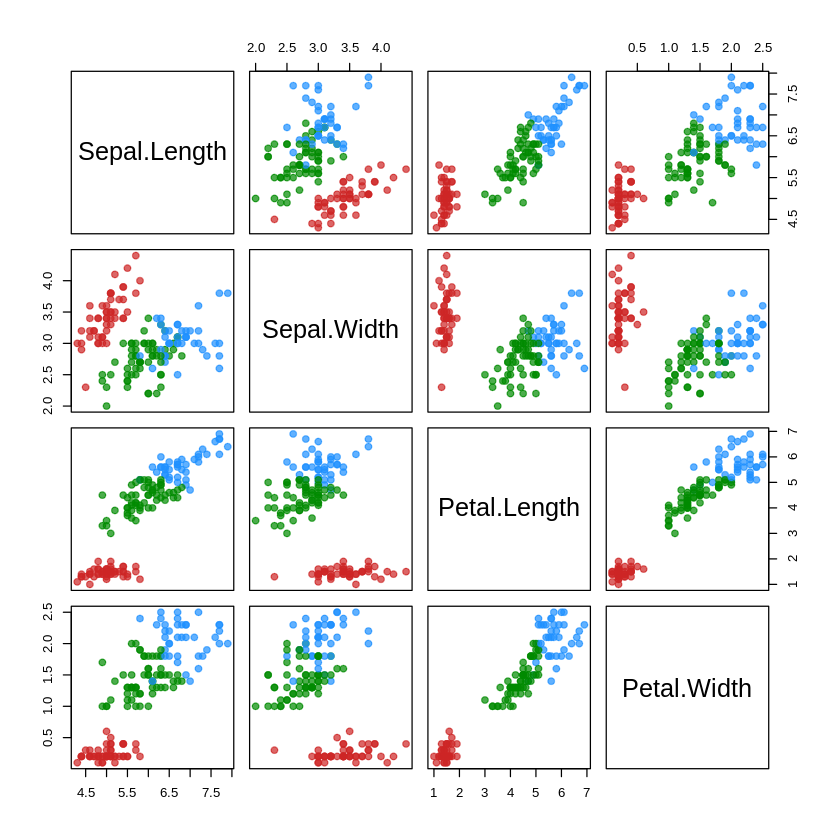

In [ ]:
plotcluster(res.fcm, cp=1, trans=TRUE)

Warning message:
“ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


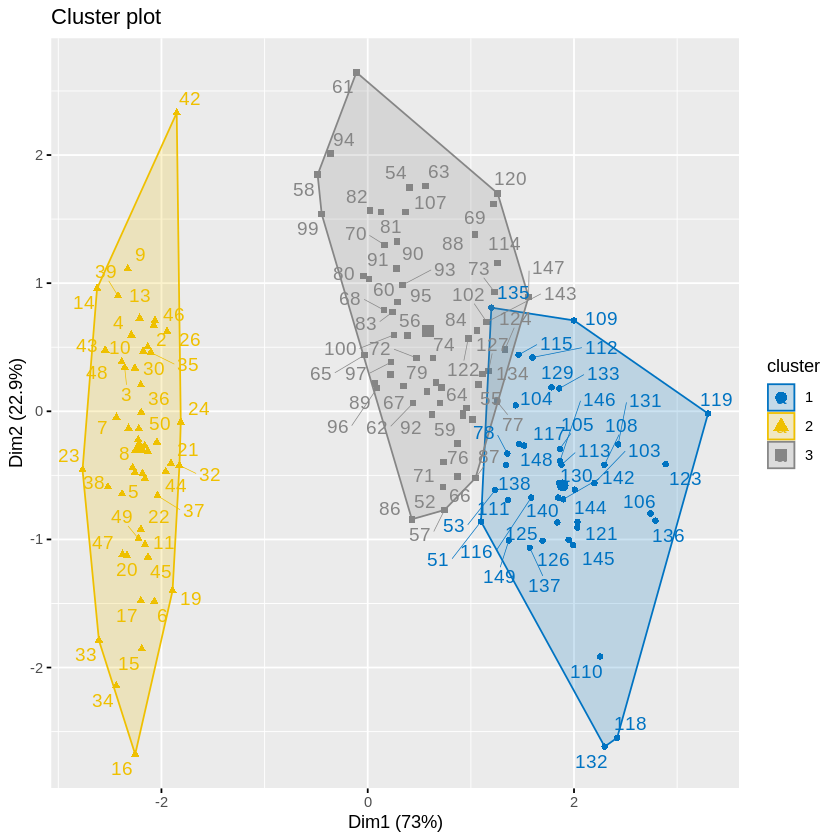

In [ ]:
res.fcm2 <- ppclust2(res.fcm, "kmeans")
fviz_cluster(res.fcm2, data = x, 
  ellipse.type = "convex",
  palette = "jco",
  repel = TRUE)

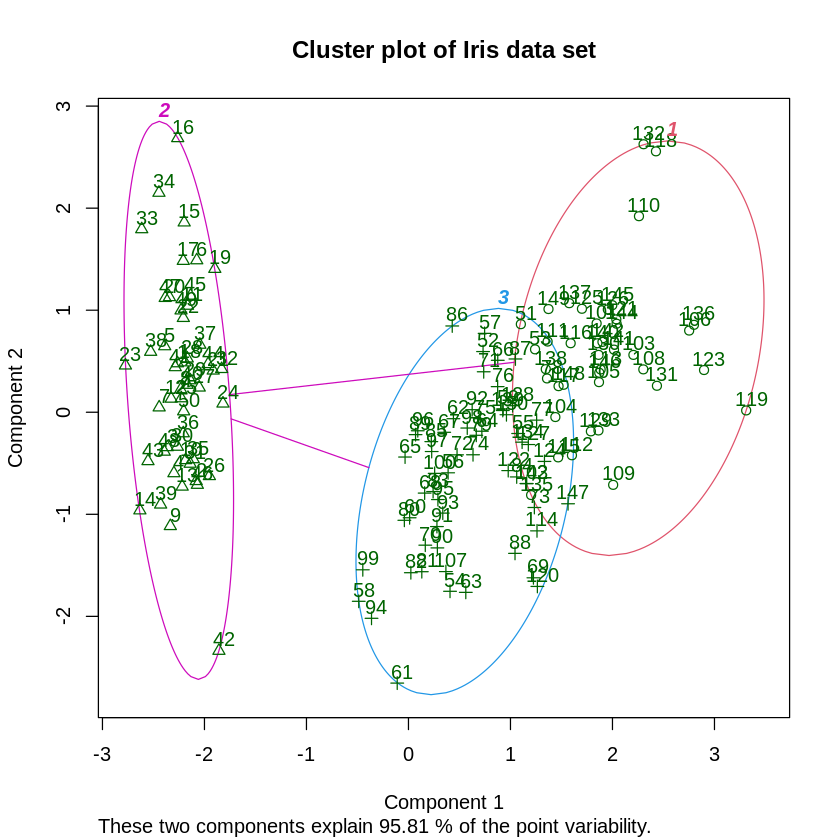

In [ ]:
res.fcm3 <- ppclust2(res.fcm, "fanny")

cluster::clusplot(scale(x), res.fcm3$cluster,  
  main = "Cluster plot of Iris data set",
  color=TRUE, labels = 2, lines = 2, cex=1)